# Supletorio Big Data

&emsp; **Fundación Universitaria Los Libertadores**. <br>
&emsp; **Asignatura:** Big Data. <br>
&emsp; **Período:** 2023-I. <br>
&emsp; **Profesor:** Juan Martín Londoño Zuluaga. <br>
&emsp; **Estudiante:**

# Películas y Programas de TV de Netflix

Los chismes vuelan: todo mundo ha oído que los estudiantes de Big Data de la FULL son los mejores analistas de datos. Por ello, le han contratado para realizar análisis de datos de películas y programas de TV de Netflix, cuya base de datos se encuentra en la siguiente [página web](https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies). Quienes le contrataron tienen las siguientes demandas y preguntas:

# 1. Importe de los datos (10 puntos)

En primer lugar, le envían la base de datos llamada "titles.csv". Le piden que la cargue y les muestre las primeras 10 filas.

In [2]:
import pandas as pd
import numpy  as np

# Cargando la base de datos
data = pd.read_csv("titles.csv")
data.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2


# 2. Calidad de los datos

## 2.1. Valores perdidos

Encuentre el número de valores perdidos (_missings_) como **porcentaje del total** de la base de datos por columna:

In [3]:
# Suma de los valores perdidos por variable
data.isnull().sum()/len(data)

id                      0.000000
title                   0.000172
type                    0.000000
description             0.003100
release_year            0.000000
age_certification       0.449535
runtime                 0.000000
genres                  0.000000
production_countries    0.000000
seasons                 0.647434
imdb_id                 0.076473
imdb_score              0.090079
imdb_votes              0.092835
tmdb_popularity         0.016190
tmdb_score              0.054771
dtype: float64

## 2.2. Valores únicos

Encuentre los valores únicos de cada columna en la base de datos:

In [4]:
data.nunique()

id                      5806
title                   5751
type                       2
description             5785
release_year              67
age_certification         11
runtime                  205
genres                  1626
production_countries     449
seasons                   23
imdb_id                 5362
imdb_score                81
imdb_votes              3831
tmdb_popularity         4943
tmdb_score                78
dtype: int64

## 2.3. Los falsos valores únicos: `production_countries`

Revise nuevamente la columna `production_countries`, ¿no le parece extraño que haya 449 países en el mundo? Según Wikipedia hay entre 193 y 211 países reconocidos. ¿Qué ocurre entonces? ¿Cómo se le ocurre resolverlo (no lo resuelva, solo cuente cómo)?

In [5]:
data.production_countries.unique()

array(["['US']", "['GB']", "['US', 'GB']", "['JP']", "['EG']", "['DE']",
       "['IN']", '[]', "['DZ', 'EG']", "['LB']", "['FR', 'LB', 'CA']",
       "['IN', 'SU']", "['US', 'IT']", "['HK', 'US']", "['GB', 'US']",
       "['AR']", "['KW']", "['EG', 'FR']", "['FR', 'LB']", "['US', 'JP']",
       "['US', 'CA']", "['DE', 'US']", "['US', 'DE']", "['CA', 'US']",
       "['US', 'FR']", "['PE', 'US', 'BR']", "['IT', 'US', 'FR']",
       "['US', 'HK']", "['FR', 'IE', 'GB', 'DE']",
       "['GH', 'GB', 'US', 'BF', 'DE']", "['AR', 'ES']", "['FR']",
       "['MX']", "['AU']", "['CO']", "['BE', 'FR', 'NO', 'LB']",
       "['IT', 'LB', 'BE', 'FR']", "['US', 'FR', 'DE', 'PS']", "['TR']",
       "['CA']", "['GB', 'US', 'BS', 'CZ', 'DE']", "['GB', 'US', 'AU']",
       "['DE', 'ES', 'US', 'FR']", "['GB', 'US', 'AU', 'DE']",
       "['JP', 'US']", "['US', 'IS', 'GB']", "['DK']",
       "['NZ', 'JP', 'US']", "['US', 'CA', 'FR']", "['GB', 'US', 'DE']",
       "['US', 'DE', 'IT', 'GB']", "['CA', 'DE', 'US

# 3. Análisis univariado

Muestre en una gráfica la distribución de los puntajes de IMDB (`imbd_score`) **solamente** de las **series de televisión**.

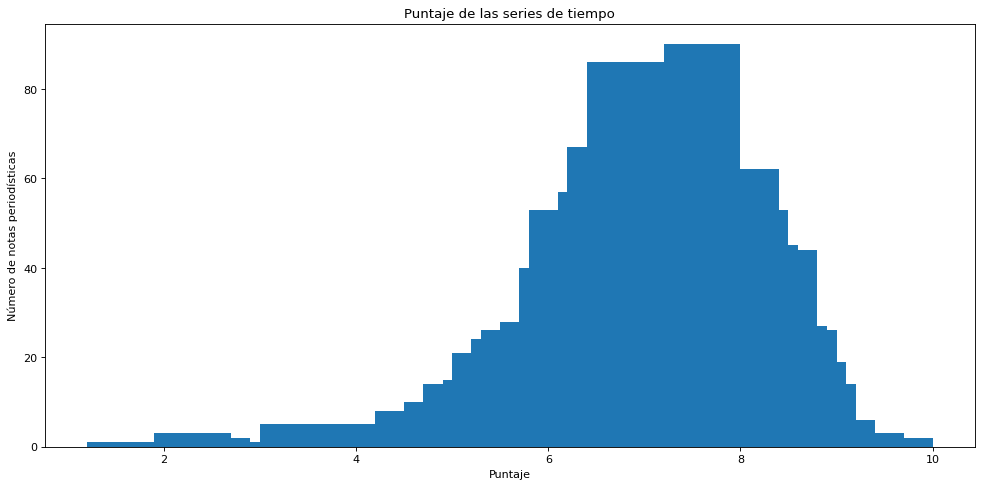

In [24]:
# Importing libraries
import matplotlib.pyplot as plt

# Generating the dataframe
df_temp = data[["imdb_score", "type"]][data.type == "SHOW"].groupby("imdb_score").count().reset_index()

# Plotting
plt.figure(figsize = (15, 7), dpi = 80)
plt.bar(df_temp.imdb_score, df_temp.type)
plt.xlabel("Puntaje");plt.ylabel("Número de notas periodísticas")
plt.title("Puntaje de las series de tiempo")
plt.show()

**A partir de la anterior gráfica, responda la siguiente:**

* ¿Entre qué rangos de puntaje se concentran los puntajes de los shows de televisión?

# 4. Análisis multivariado

Muestre, en una gráfica, la distribución **solamente** de las **películas** estrenadas por año.

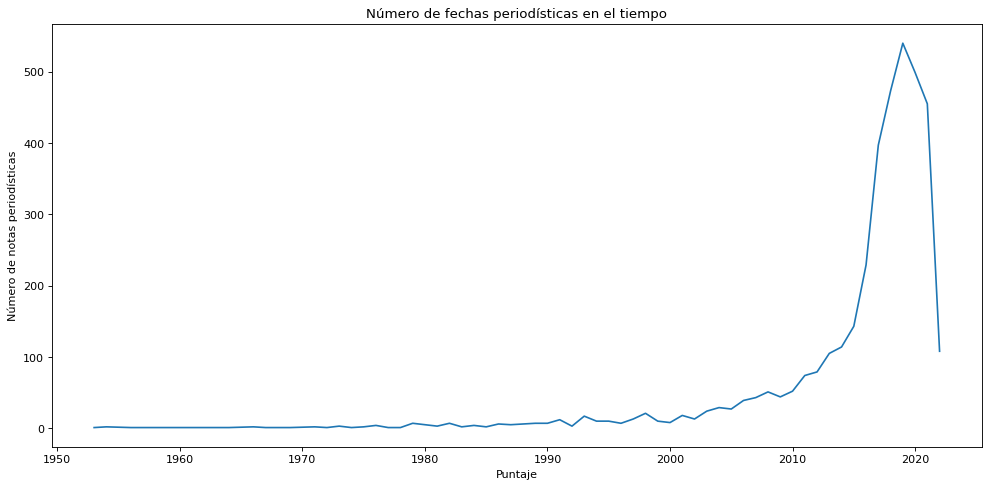

In [22]:
# Importing libraries
import matplotlib.pyplot as plt

# Generating the dataframe
df_temp = data[["type", "id", "release_year"]][(data.type == "MOVIE")].groupby("release_year").count().reset_index()

# Plotting
plt.figure(figsize = (15, 7), dpi = 80)
plt.plot("release_year", "id", data = df_temp)
plt.xlabel("Puntaje");plt.ylabel("Número de notas periodísticas")
plt.title("Número de fechas periodísticas en el tiempo")
plt.show()

**Responda a lo siguiente solamente con la gráfica:**

* ¿En qué década se estrenaron más películas?